In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

plt.style.use('ggplot')

import nltk

In [3]:
df = pd.read_csv('headlines_with_links_upvotes_content.csv')

In [5]:
headlines = df['title']


In [6]:
headlines.to_csv("sentiment.csv", header = False, encoding = "utf-8", index = False)

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sia = SIA()
sentiments = []

for line in headlines:
    sentiment = sia.polarity_scores(line)
    sentiment["headline"] = line
    sentiments.append(sentiment)




[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/june/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [7]:
vaders = pd.DataFrame(sentiments)
#vaders = vaders.reset_index().rename(columns={'index': 'Id'})
#vaders = vaders.merge(df, how='left')
vaders = [df, vaders]
vaders = pd.concat(vaders, axis=1, join='inner')

print(vaders)
vaders.to_csv("results.csv", index = False)


                                                 title  score  \
0                               that's my UAlberta :')   1097   
1                            I got the last croissant.    930   
2    Every upper level Student in their 100 level o...    892   
3    400 upvotes and we will put a cowboy hat on th...    830   
4                                                 Hmmm    750   
..                                                 ...    ...   
988                    Reminder: beware of the stairs.    232   
989    Update: The perfume to seduce engg girls worked    230   
990                  I'm downvoting all your schedules    229   
991  A high GPA means nothing if you're not alive t...    229   
992                    Congrats if you're done finals!    214   

                                                   url  num_comments  \
0                  https://i.redd.it/mh7v2l10ckk51.jpg            26   
1    https://www.reddit.com/r/uAlberta/comments/10d...            61   
2  

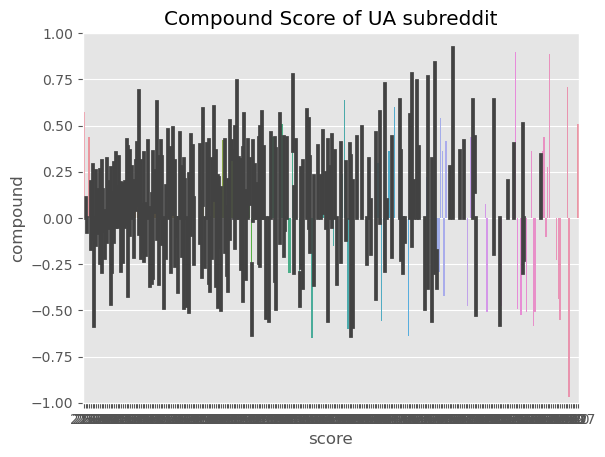

In [9]:
ax = sns.barplot(data=vaders, x='score', y='compound')
ax.set_title('Compound Score of UA subreddit')
ax.set_ylim(-1,1)
plt.show()

In [240]:
# import matplotlib.pyplot as plt
# plt.figure(figsize = (8,8))
# plt.yticks(np.arange(-1,1,0.1))

# plt.plot(df['score'], vaders['compound'], 'ro', alpha = 0.5, markersize = 2)

# plt.xlabel('upvotes')
# plt.ylabel('compound')
# plt.show()


/var/folders/9z/s57q0qpj6gzcryclcln5mf7r0000gn/T/ipykernel_60348/1387681244.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


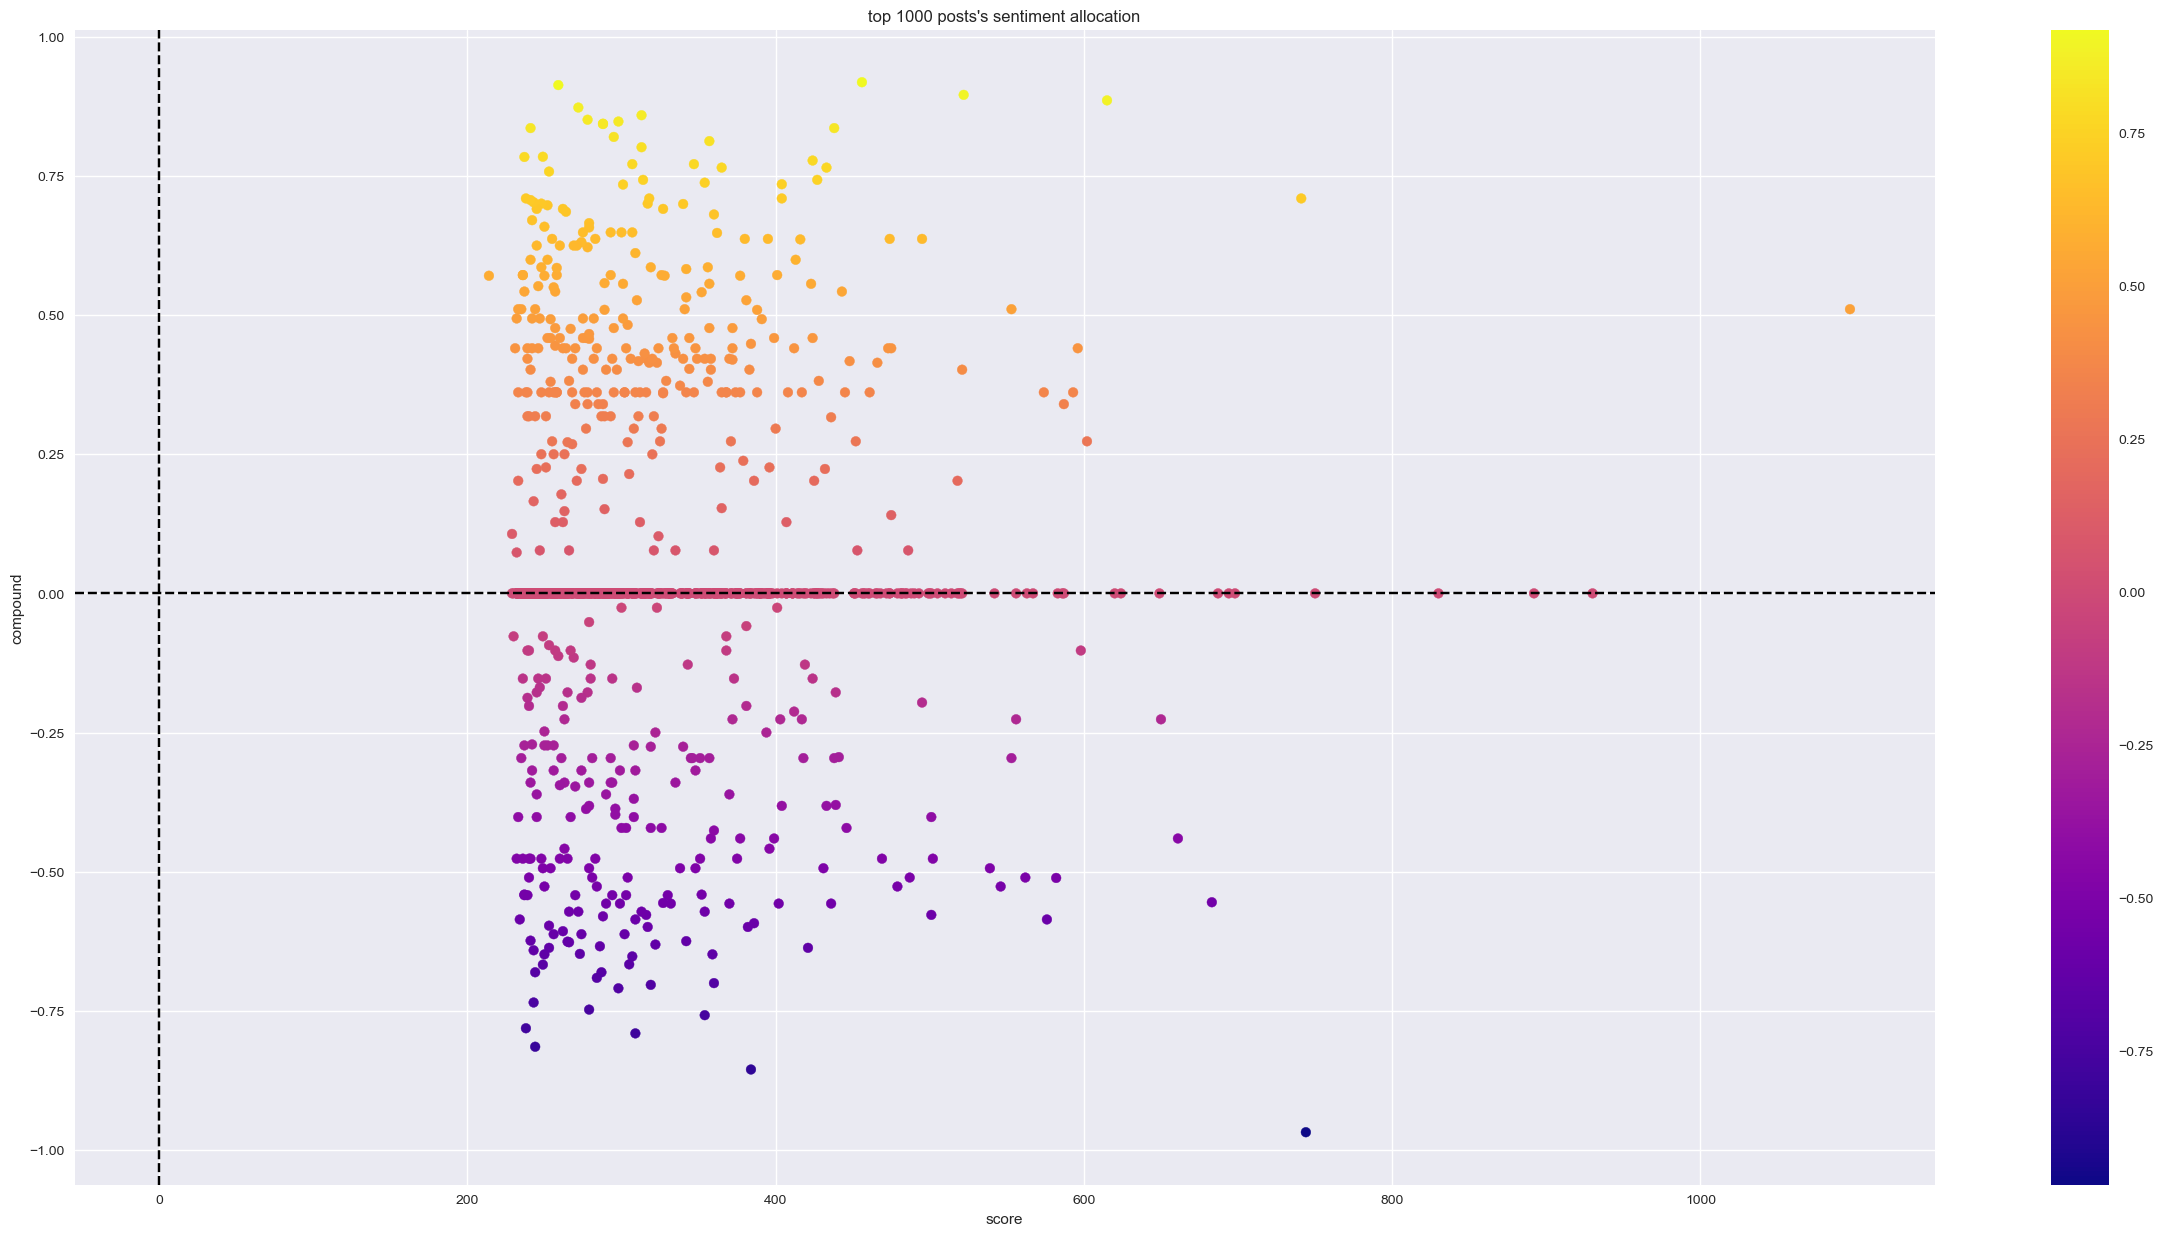

In [318]:
x = df['score']
y = vaders['compound'] 
  
# adding style theme in scatter plot 
plt.style.use('seaborn') 
plt.figure(figsize = (30,15))
# creating scatter plot with both negative  
# and positive axes 
plt.scatter(x, y, c=y, cmap='plasma') 
  
# adding vertical line in data co-ordinates 
plt.axvline(0, c='black', ls='--') 
  
# adding horizontal line in data co-ordinates 
plt.axhline(0, c='black', ls='--') 
  
# giving x label to the plot 
plt.xlabel("score") 
  
# giving y label to the plot 
plt.ylabel("compound") 
  
# giving title to the plot 
plt.title("top 1000 posts's sentiment allocation") 
  
  
# visualizing the mapping from values to colors 
plt.colorbar() 
  
# visualizing the plot using plt.show() function 
plt.show() 

/var/folders/9z/s57q0qpj6gzcryclcln5mf7r0000gn/T/ipykernel_60348/2042028499.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


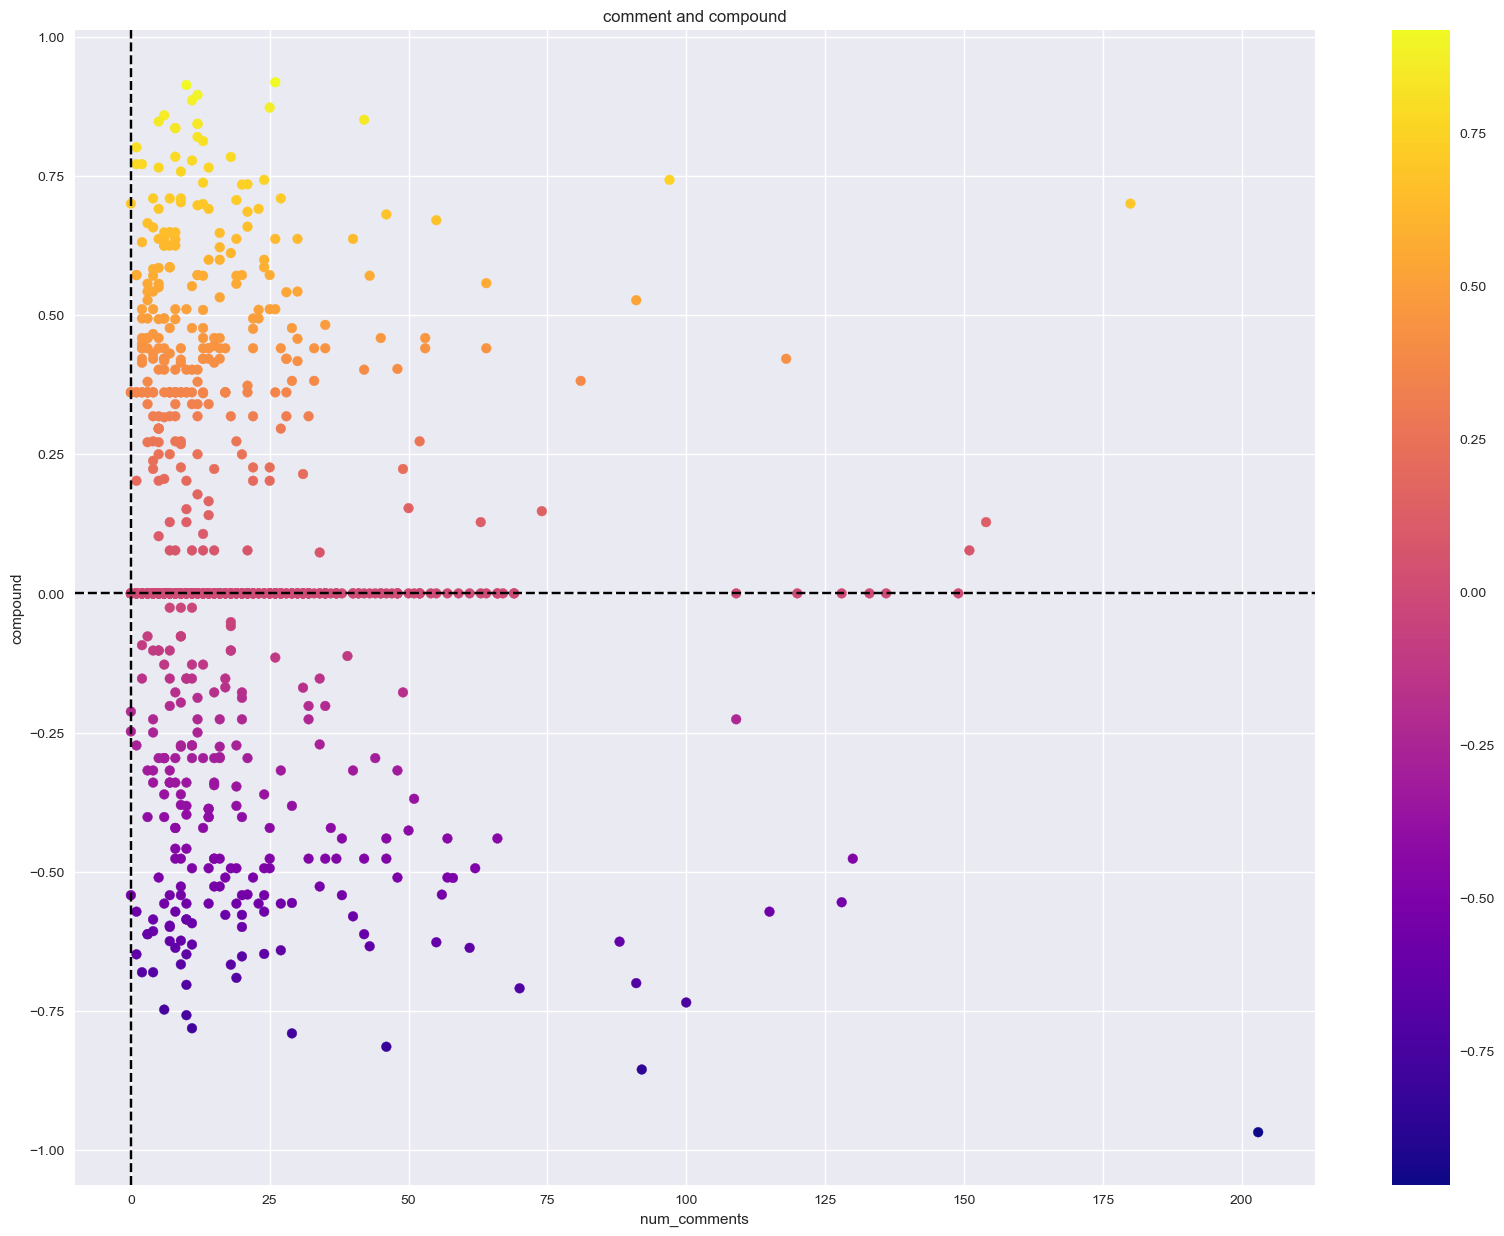

In [292]:
x = df['num_comments']
y = vaders['compound'] 
  
# adding style theme in scatter plot 
plt.style.use('seaborn') 
plt.figure(figsize = (20,15))
# creating scatter plot with both negative  
# and positive axes 
plt.scatter(x, y, c=y, cmap='plasma') 
  
# adding vertical line in data co-ordinates 
plt.axvline(0, c='black', ls='--') 
  
# adding horizontal line in data co-ordinates 
plt.axhline(0, c='black', ls='--') 
  
# giving x label to the plot 
plt.xlabel("num_comments") 
  
# giving y label to the plot 
plt.ylabel("compound") 
  
# giving title to the plot 
plt.title("comment and compound") 
  
  
# visualizing the mapping from values to colors 
plt.colorbar() 
  
# visualizing the plot using plt.show() function 
plt.show() 

283 203 507


([<matplotlib.patches.Wedge at 0x285d809d0>,
 [Text(0.8808323128882103, 0.6588887892292646, 'Negtive'),
  Text(-1.0649551557500043, 0.27544603144987306, 'Neutral'),
  Text(0.6877805954616095, -0.858462493360353, 'Positive')])

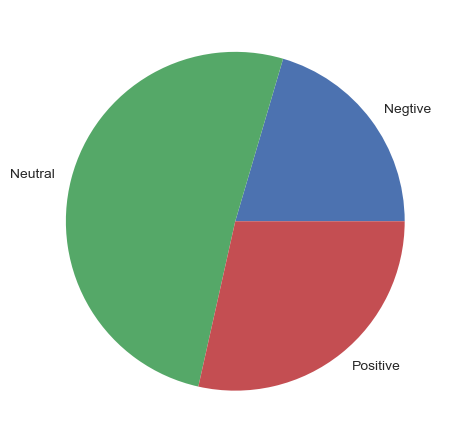

In [300]:
pos = []
neg = []
neu = []
for i in vaders['compound']:
    if i>0 :
        pos.append(i)
    elif i<0:
        neg.append(i)
    else:
        neu.append(i)
        
print(len(pos),len(neg),len(neu))

labels =  'Negtive','Neutral', 'Positive'
sizes = [203, 507, 283]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

23 51 26


([<matplotlib.patches.Wedge at 0x283b0f490>,
 [Text(0.8251221670583667, 0.7274430626715089, 'Negtive'),
  Text(-1.0951181606757014, 0.10351914875166049, 'Neutral'),
  Text(0.7530017654698314, -0.8018655381043116, 'Positive')])

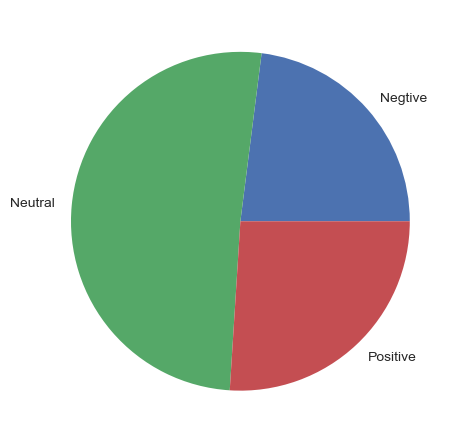

In [246]:
pos = []
neg = []
neu = []
for i in vaders['compound'].head(100):
    if i>0 :
        pos.append(i)
    elif i<0:
        neg.append(i)
    else:
        neu.append(i)
        
print(len(neg),len(neu),len(pos))

labels =  'Negtive','Neutral', 'Positive'
sizes = [len(neg),len(neu),len(pos)]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)
    

In [270]:
def cal_average(a_list):
    hot_posts = []
    sum_vote = 0

    for i in a_list:
        sum_vote += i
        hot_posts.append(i)

    average_upvote = sum_vote/len(hot_posts)
    return average_upvote

print(cal_average(vaders['score']), 
      cal_average(vaders['num_comments']))

326.6968781470292 17.644511581067473


In [281]:
valid_posts = vaders.loc[(df['score'] > 326) & (df['num_comments'] > 17)]
print(valid_posts)

valid_posts['title'].to_csv("valid_posts.csv", header = False, encoding = "utf-8", index = False)

                                                 title  score  \
0                               that's my UAlberta :')   1097   
1                            I got the last croissant.    930   
2    Every upper level Student in their 100 level o...    892   
3    400 upvotes and we will put a cowboy hat on th...    830   
5    FUCK YOU FUCK YOU FUCK YOU FUCK YOU FUCK YOU F...    744   
..                                                 ...    ...   
366                                   Feels Bad Man...    330   
370                                    Dear First Year    329   
372                       Your exams don't define you!    331   
374   If you are doing this then you are fucking idiot    327   
384  SUB today, 11:30am. We sure miss seeing you fo...    328   

                                                   url  num_comments  \
0                  https://i.redd.it/mh7v2l10ckk51.jpg            26   
1    https://www.reddit.com/r/uAlberta/comments/10d...            61   
2  

35 66 31


([<matplotlib.patches.Wedge at 0x28e924c50>,
 [Text(0.7399264480203086, 0.8139464672323663, 'Negtive'),
  Text(-1.095019124323497, -0.1045615482182722, 'Neutral'),
  Text(0.8139464325939086, -0.7399264861238919, 'Positive')])

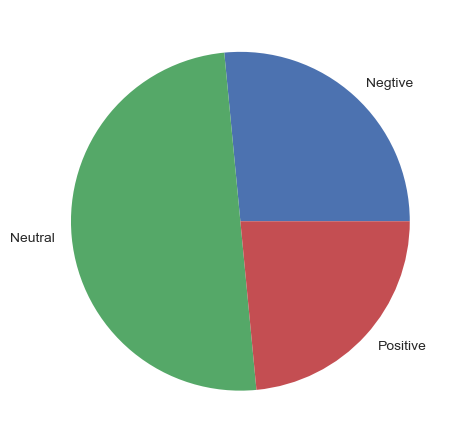

In [282]:
pos = []
neg = []
neu = []
for i in valid_posts['compound']:
    if i>0 :
        pos.append(i)
    elif i<0:
        neg.append(i)
    else:
        neu.append(i)
        
print(len(neg),len(neu),len(pos))

labels =  'Negtive','Neutral', 'Positive'
sizes = [len(neg),len(neu),len(pos)]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

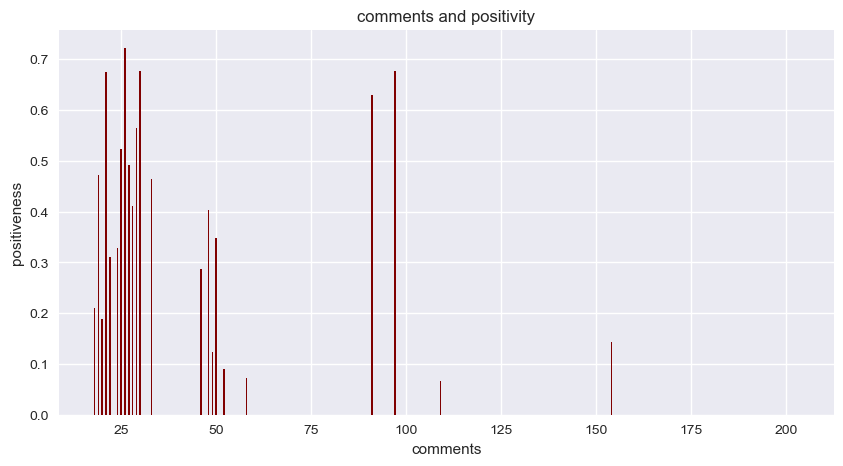

In [288]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar( valid_posts['num_comments'], valid_posts['pos'], color ='maroon', 
        width = 0.4)
 
plt.xlabel("comments")
plt.ylabel("positiveness")
plt.title("comments and positivity")
plt.show()

/var/folders/9z/s57q0qpj6gzcryclcln5mf7r0000gn/T/ipykernel_60348/396356807.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


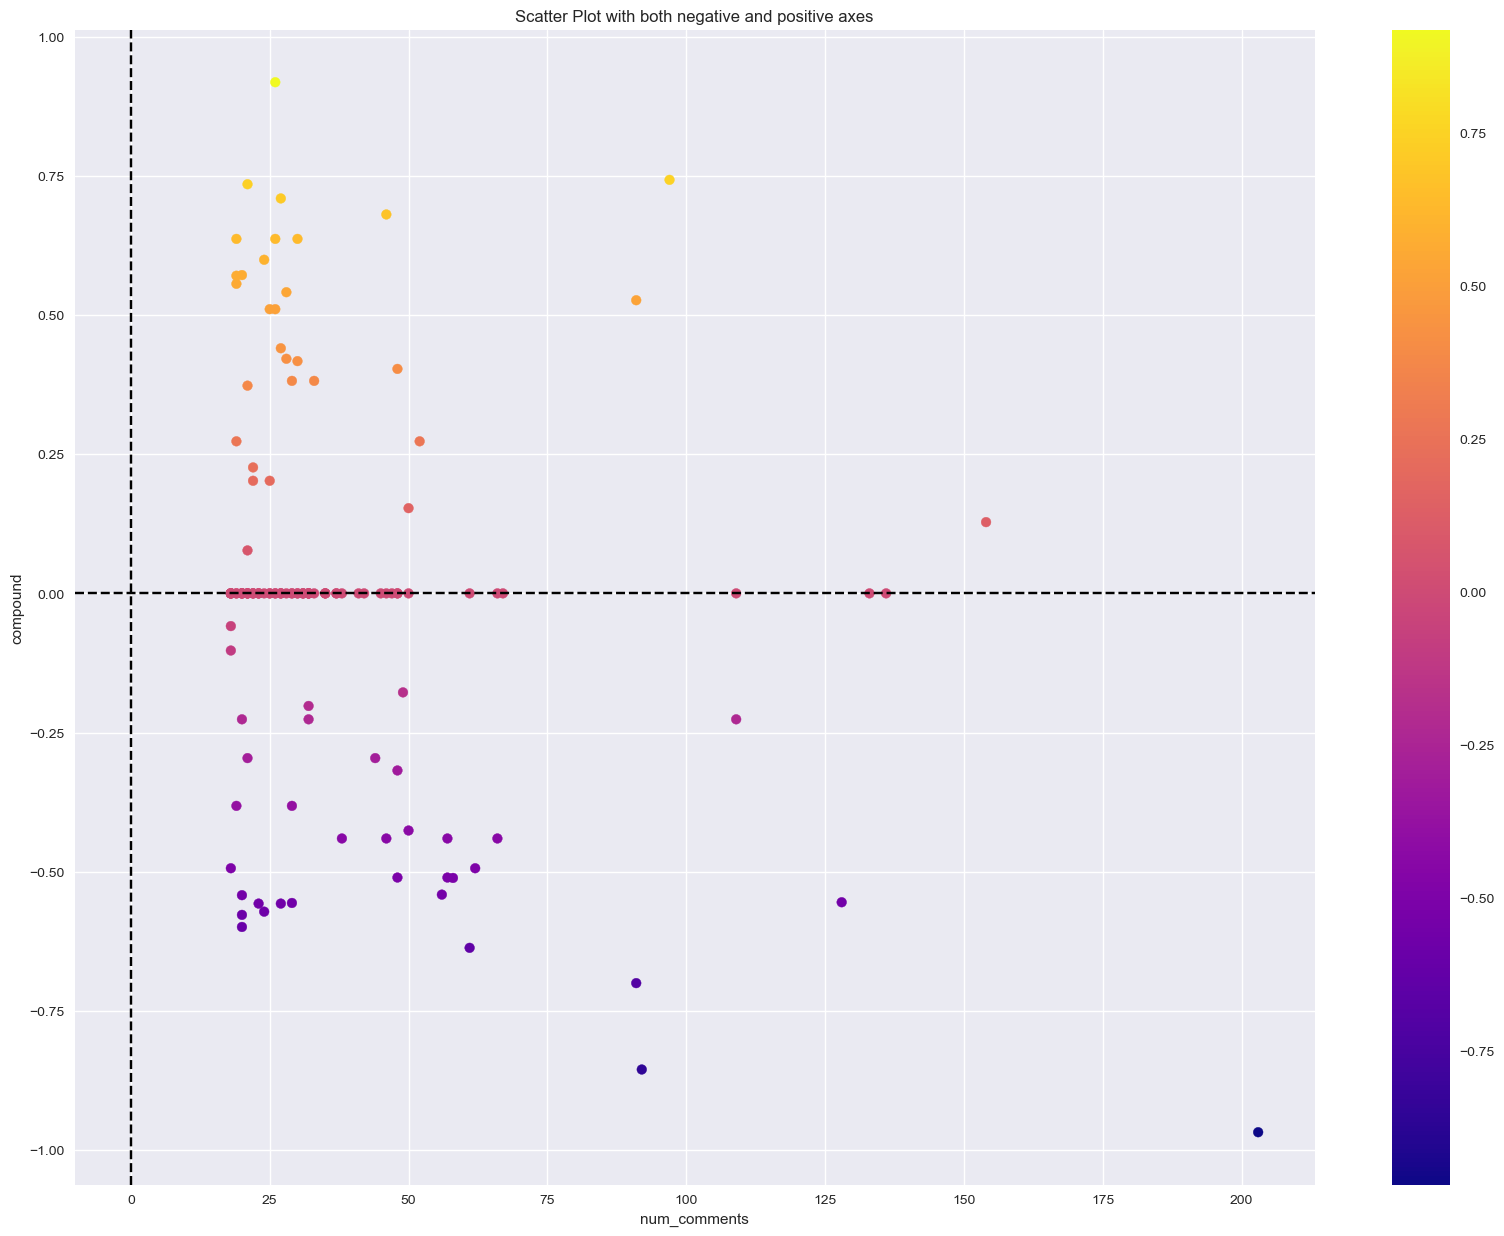

In [283]:
x = valid_posts['num_comments']
y = valid_posts['compound'] 
  
# adding style theme in scatter plot 
plt.style.use('seaborn') 
plt.figure(figsize = (20,15))
# creating scatter plot with both negative  
# and positive axes 
plt.scatter(x, y, c=y, cmap='plasma') 
  
# adding vertical line in data co-ordinates 
plt.axvline(0, c='black', ls='--') 
  
# adding horizontal line in data co-ordinates 
plt.axhline(0, c='black', ls='--') 
  
# giving x label to the plot 
plt.xlabel("num_comments") 
  
# giving y label to the plot 
plt.ylabel("compound") 
  
# giving title to the plot 
plt.title("valid posts comments and sentiments") 
  
  
# visualizing the mapping from values to colors 
plt.colorbar() 
  
# visualizing the plot using plt.show() function 
plt.show() 

/var/folders/9z/s57q0qpj6gzcryclcln5mf7r0000gn/T/ipykernel_60348/2777935570.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


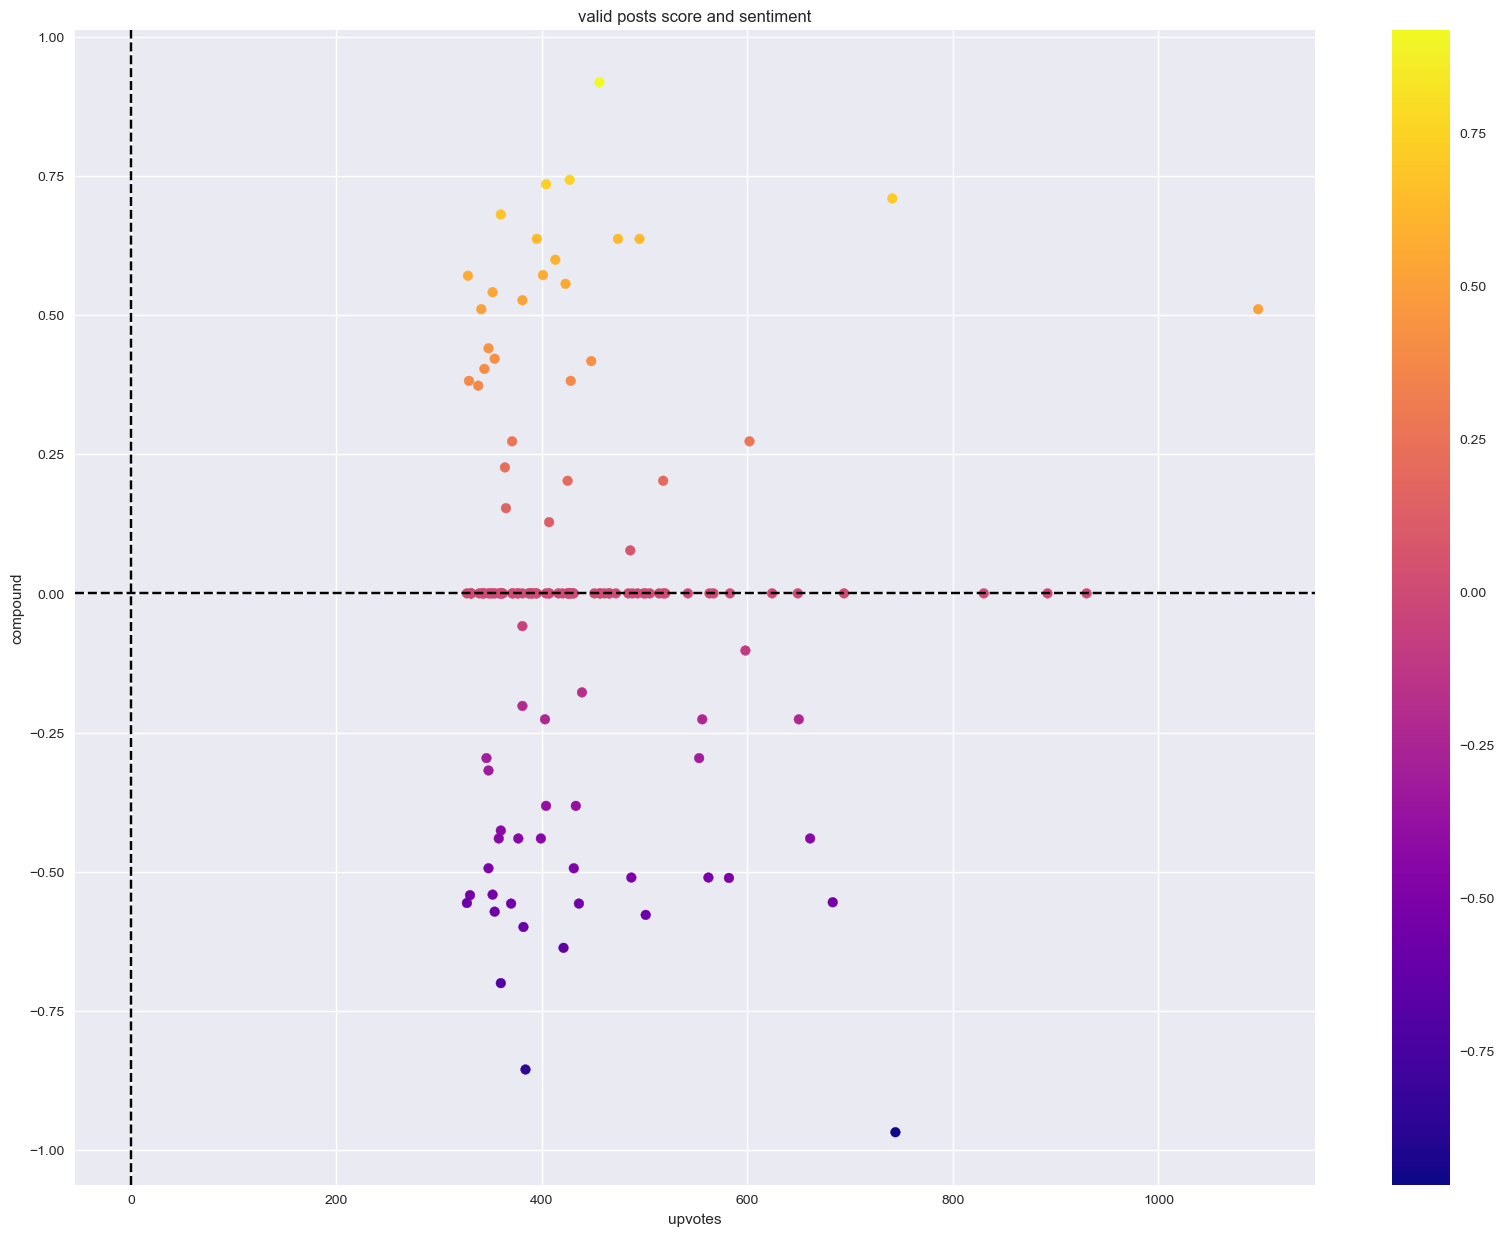

In [310]:
x = valid_posts['score']
y = valid_posts['compound'] 
  
# adding style theme in scatter plot 
plt.style.use('seaborn') 
plt.figure(figsize = (20,15))
# creating scatter plot with both negative  
# and positive axes 
plt.scatter(x, y, c=y, cmap='plasma') 
  
# adding vertical line in data co-ordinates 
plt.axvline(0, c='black', ls='--') 
  
# adding horizontal line in data co-ordinates 
plt.axhline(0, c='black', ls='--') 
  
# giving x label to the plot 
plt.xlabel("upvotes") 
  
# giving y label to the plot 
plt.ylabel("compound") 
  
# giving title to the plot 
plt.title("valid posts score and sentiment") 
  
  
# visualizing the mapping from values to colors 
plt.colorbar() 
  
# visualizing the plot using plt.show() function 
plt.show() 

/var/folders/9z/s57q0qpj6gzcryclcln5mf7r0000gn/T/ipykernel_60348/26287034.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=valid_posts, x='score', y='compound', ci=None)


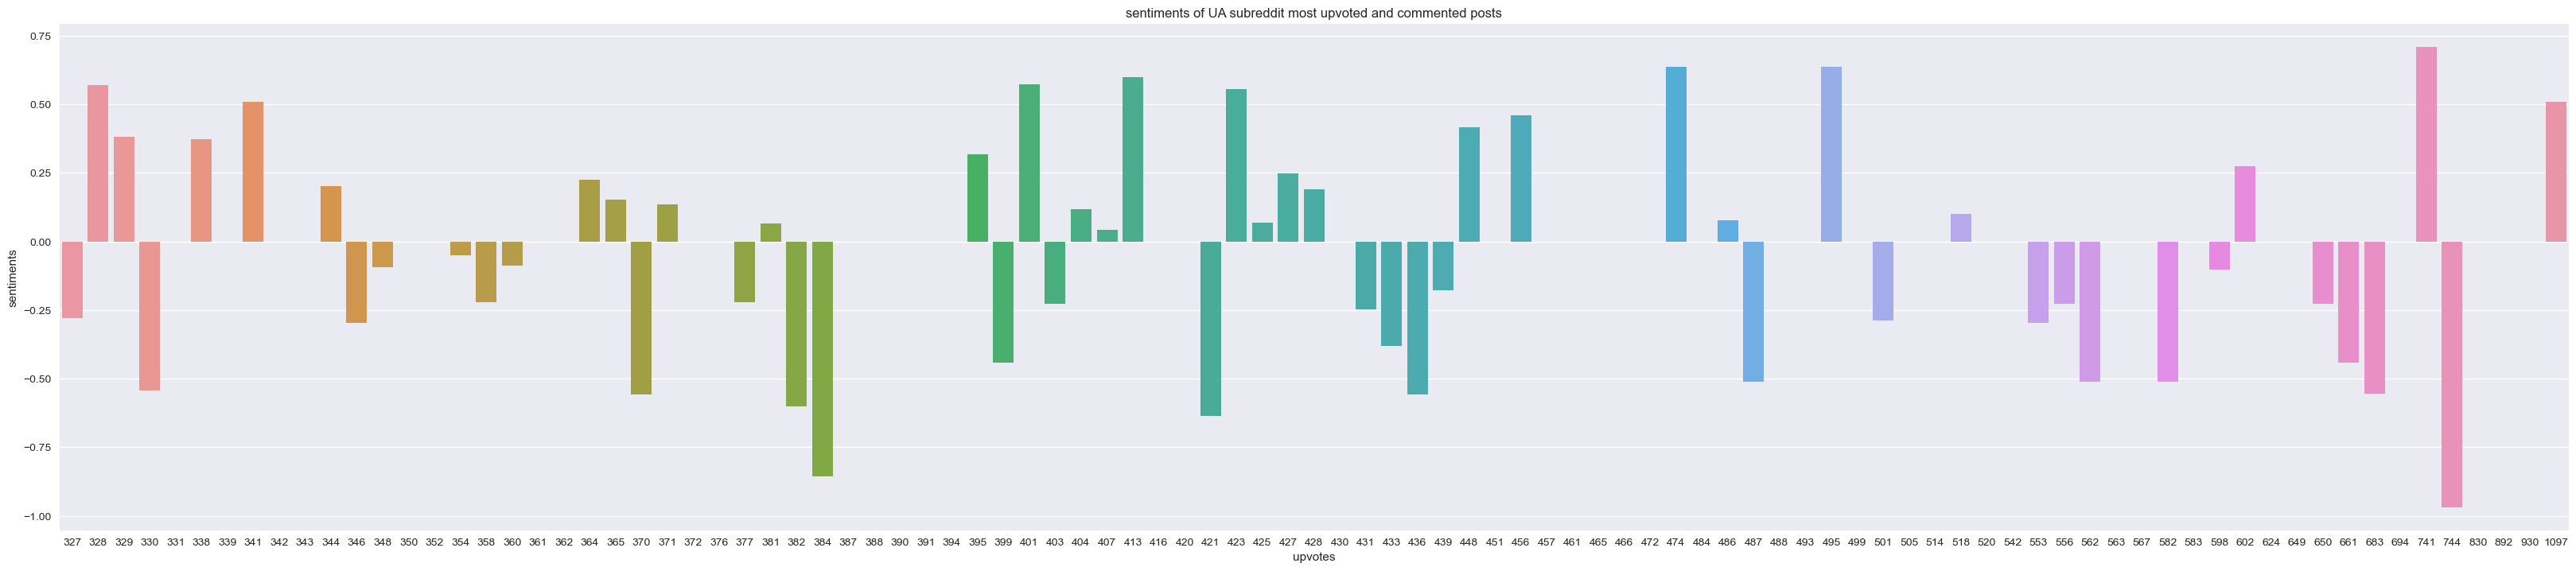

In [316]:
ax = sns.barplot(data=valid_posts, x='score', y='compound', ci=None)
ax.set_title('sentiments of UA subreddit most upvoted and commented posts in relation to upvotes')
plt.xlabel("upvotes")
plt.ylabel("sentiments")
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 40.7,8.27
plt.show()


/var/folders/9z/s57q0qpj6gzcryclcln5mf7r0000gn/T/ipykernel_60348/157457579.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=valid_posts, x='num_comments', y='compound', ci=None)


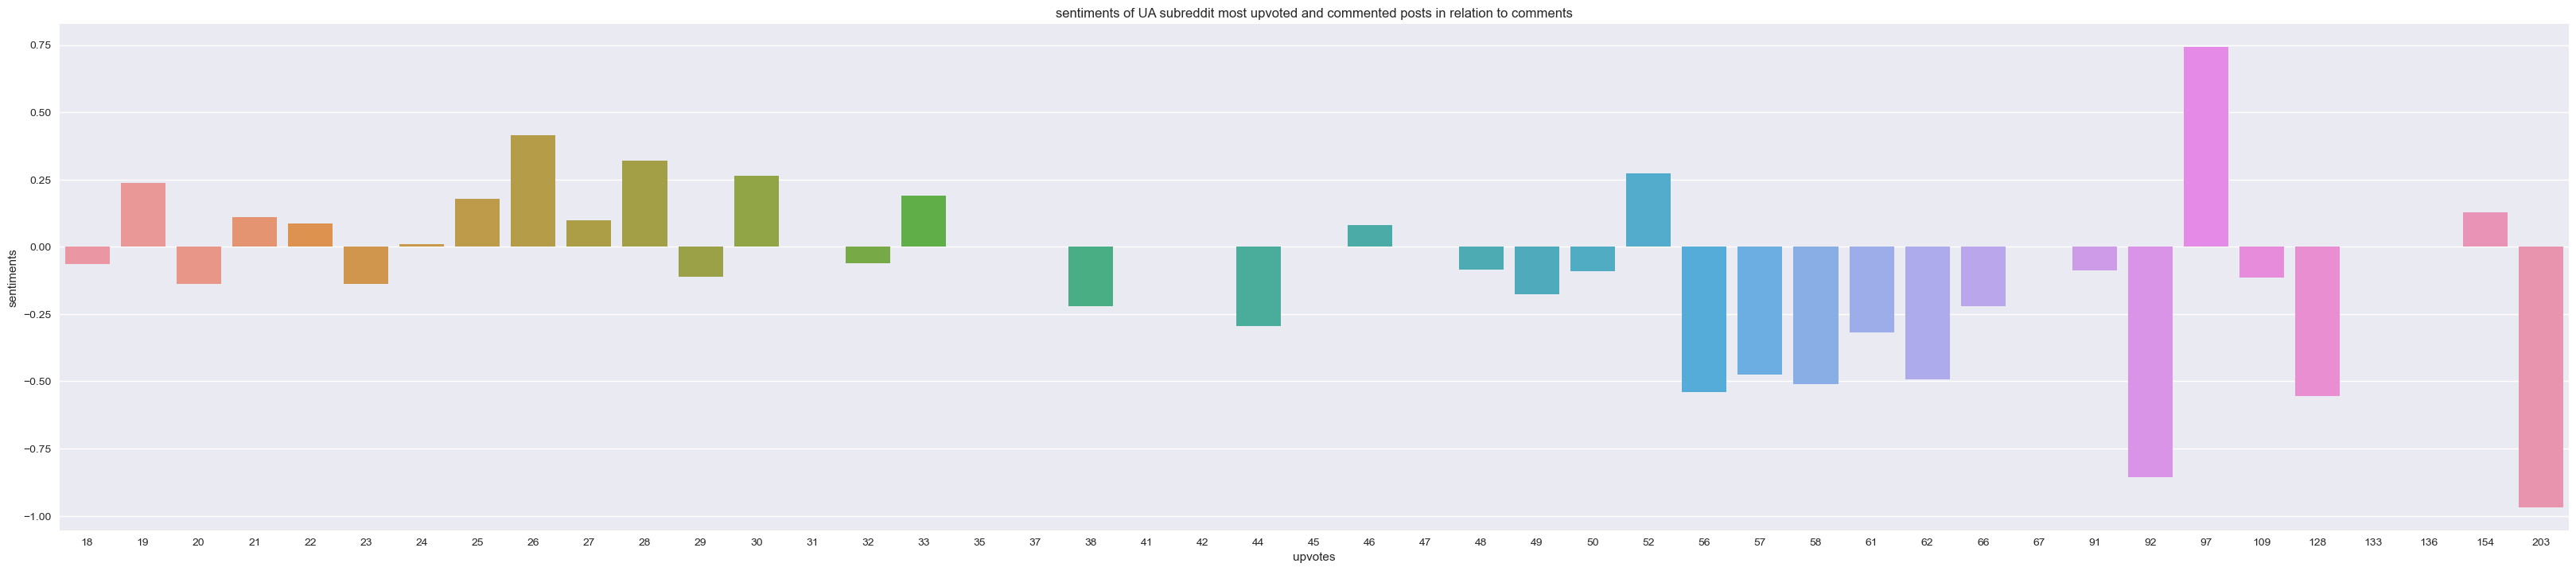

In [317]:
ax = sns.barplot(data=valid_posts, x='num_comments', y='compound', ci=None)
ax.set_title('sentiments of UA subreddit most upvoted and commented posts in relation to comments')
plt.xlabel("upvotes")
plt.ylabel("sentiments")
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 40.7,8.27
plt.show()